Dataset-class.marks.csv

**Introduction**
Student performance evaluation is essential in academic institutions to assess knowledge retention and learning outcomes. The class marks dataset consists of scores obtained by students in different questions of an exam. This dataset helps in analyzing students' strengths and weaknesses, identifying challenging questions, and understanding overall performance trends. By visualizing this data, we can gain insights into score distributions, common patterns in student performance, and areas that may require additional instructional support.

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
a = pd.read_csv("class_marks.csv")
a.fillna(0, inplace=True)
a["Q1"] = a["Q1aM4"] + a["Q1bM6"]
a["Q2"] = a["Q2aM6"] + a["Q2bM4"]
a["Q3"] = a["Q3aM5"] + a["Q3bM5"]
a["Q4"] = a["Q4aM3"] + a["Q4bM7"]
a["Q5"] = a["Q5M10"]
a["Q6"] = a["Q6aM4"] + a["Q6bM6"]
columns_to_drop = [
    "Q1aM4", "Q1bM6", "Q2aM6", "Q2bM4", 
    "Q3aM5", "Q3bM5", "Q4aM3", "Q4bM7", 
    "Q5M10", "Q6aM4", "Q6bM6"
]
a = a.drop(columns=columns_to_drop)
a = a.astype(int)
def assign_grade(total):
    if total >= 45:
        return 'A+'
    elif total >= 40:
        return 'A'
    elif total >= 35:
        return 'B'
    elif total >= 30:
        return 'C'
    elif total >= 25:
        return 'D'
    else:
        return 'F'
a['Grade'] = a['Total'].apply(assign_grade)
a


,Total,Q1,Q2,Q3,Q4,Q5,Q6,Grade
0,37,9,10,3,5,8,10,B
1,32,7,7,0,9,9,0,C
2,33,9,6,10,0,8,0,C
3,24,10,9,4,0,0,2,F
4,36,9,8,9,0,10,0,B
...,...,...,...,...,...,...,...,...
81,32,9,7,8,0,0,10,C
82,27,4,8,0,0,7,8,D
83,37,10,8,0,0,9,10,B
84,28,4,9,9,0,6,0,D


**Column Description**
Total - The total marks obtained by a student.
Q1aM4 - Marks scored in question 1a (maximum 4 marks).
Q1bM6 - Marks scored in question 1b (maximum 6 marks).
Q2aM6 - Marks scored in question 2a (maximum 6 marks).
Q2bM4 - Marks scored in question 2b (maximum 4 marks).
Q3aM5 - Marks scored in question 3a (maximum 5 marks).
Q3bM5 - Marks scored in question 3b (maximum 5 marks).
Q4aM3 - Marks scored in question 4a (maximum 3 marks).
Q4bM7 - Marks scored in question 4b (maximum 7 marks).
Q5M10 - Marks scored in question 5 (maximum 10 marks).
Q6aM4 - Marks scored in question 6a (maximum 4 marks).
Q6bM6 - Marks scored in question 6b (maximum 6 marks).

In [97]:
a.shape

(86, 8)

In [98]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Total   86 non-null     int32 
 1   Q1      86 non-null     int32 
 2   Q2      86 non-null     int32 
 3   Q3      86 non-null     int32 
 4   Q4      86 non-null     int32 
 5   Q5      86 non-null     int32 
 6   Q6      86 non-null     int32 
 7   Grade   86 non-null     object
dtypes: int32(7), object(1)
memory usage: 3.2+ KB


Processesing a dataset class_marks.csv, computes aggregated scores (Q1–Q6, TOTAL) from sub-columns, drops the original sub-columns, and retains only the processed, meaningful columns.

In [100]:
a=a.sort_values("Total",ascending=True)
a

,Total,Q1,Q2,Q3,Q4,Q5,Q6,Grade
69,3,1,1,0,1,0,0,F
11,8,4,3,1,0,0,0,F
23,9,7,0,0,0,0,2,F
22,14,8,7,0,0,0,0,F
57,17,3,4,0,10,0,4,F
...,...,...,...,...,...,...,...,...
73,40,10,0,10,3,10,10,A
53,40,10,10,10,0,10,0,A
51,40,0,10,0,10,10,0,A
33,40,0,10,10,10,0,10,A


The dataset `a` is sorted in ascending order based on the "Total" column, rearranging the rows so that entries with the lowest total scores appear first.

**Data visualizations**

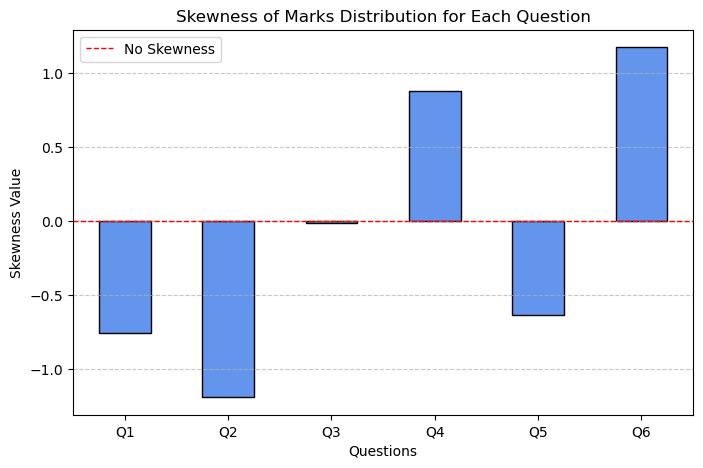

In [103]:
from scipy.stats import skew
filtered_data = a.loc[(a['Total'] >= 25) & (a['Total'] <= 35)]
skewness_values = filtered_data[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']].apply(skew)
plt.figure(figsize=(8, 5))
skewness_values.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.axhline(0, color='red', linestyle='--', linewidth=1, label="No Skewness")

plt.title("Skewness of Marks Distribution for Each Question")
plt.xlabel("Questions")
plt.ylabel("Skewness Value")
plt.xticks(rotation=0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Code calculates the skewness of marks distribution for each question (Q1 to Q6) within a filtered range of total marks (25-35) and visualizes it using a bar plot
Skewness is a measure of the asymmetry of a distribution, where:
Positive skew indicates that the right tail (higher marks) is longer or fatter.
Negative skew indicates that the left tail (lower marks) is longer or fatter.
Zero skew indicates that the distribution is symmetric.
Q1, Q2, and Q5:
These questions have negative skewness, meaning the marks are skewed towards higher values (most students performed well).
Q4 and Q6:
These questions have positive skewness, meaning the marks are skewed towards lower values (most students performed poorly).
Q3:
Has almost zero skewness, indicating a nearly symmetric marks distribution.

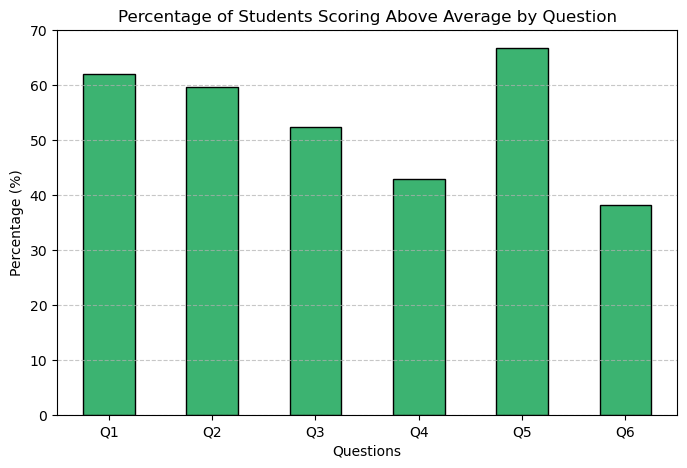

In [105]:
filtered_data = a.loc[(a['Total'] >= 25) & (a['Total'] <= 35)]
question_averages = filtered_data[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']].mean()
above_average_percentage = (
    filtered_data[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']] > question_averages
).mean() * 100

# Plot the percentages
plt.figure(figsize=(8, 5))
above_average_percentage.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title("Percentage of Students Scoring Above Average by Question")
plt.xlabel("Questions")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


code filters students data for total marks between 25-35, calculates the percentage of students scoring above average per question (Q1-Q6), and visualizes the results as a bar plot.

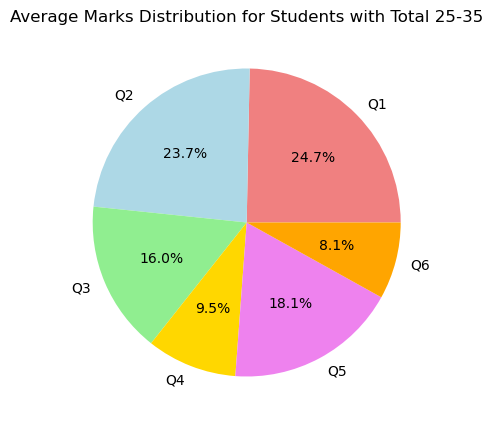

In [107]:
filtered_data = a.loc[(a['Total'] >= 25) & (a['Total'] <= 35)]
average_marks = filtered_data[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']].mean()

plt.figure(figsize=(8, 5))
average_marks.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue', 'lightgreen', 'gold', 'violet', 'orange'])
plt.title("Average Marks Distribution for Students with Total 25-35")
plt.ylabel("")  # Hide the y-label
plt.show()


Visuals represents the average marks for each question (Q1-Q6) from students with total marks between 25-35, visualized as a bar plot with labeled axes and gridlines for better clarity.

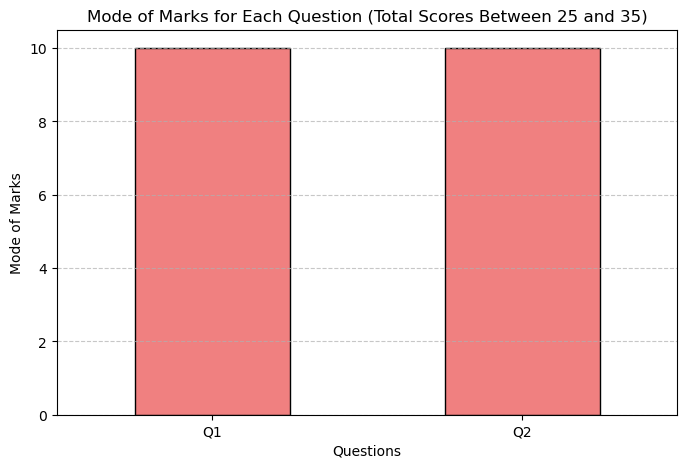

In [109]:
filtered_data = a.loc[(a['Total'] >= 25) & (a['Total'] <= 35)]
average_marks = filtered_data[['Q1', 'Q2']].mode().iloc[0]

plt.figure(figsize=(8, 5))
average_marks.plot(kind='bar', color='lightcoral', grid=False, edgecolor='black')

plt.title("Mode of Marks for Each Question (Total Scores Between 25 and 35)")
plt.xlabel("Questions")
plt.ylabel("Mode of Marks")
plt.xticks(ticks=range(len(average_marks.index)), labels=average_marks.index, rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The code calculates and visualizes the mode of marks for each question (Q1-Q6) from students with total marks between 25-35, using a bar plot to represent the most frequent scores.

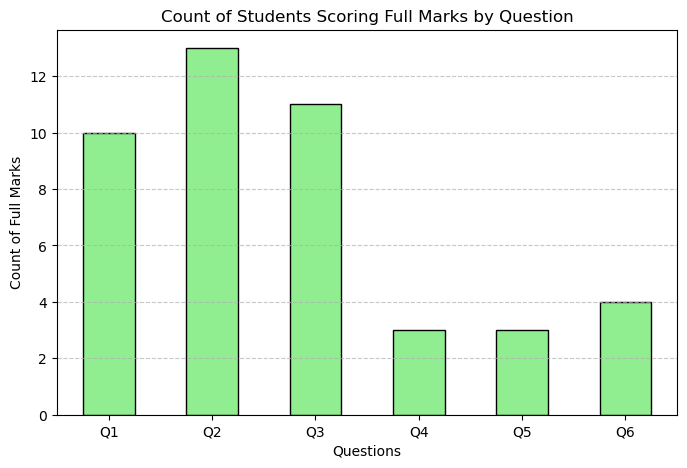

In [111]:
max_marks = filtered_data[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']].max()
full_marks_count = (filtered_data[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']] == max_marks).sum()
plt.figure(figsize=(8, 5))
full_marks_count.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Count of Students Scoring Full Marks by Question")
plt.xlabel("Questions")
plt.ylabel("Count of Full Marks")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Code displays the count of students scoring full marks for each question (Q1-Q6) among those with total marks between 25-35, visualized as a bar plot with labeled axes and gridlines.

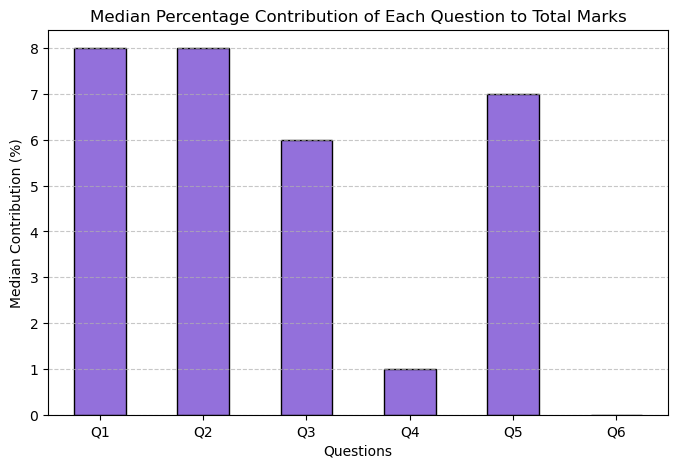

In [113]:
filtered_data = a.loc[(a['Total'] >= 25) & (a['Total'] <= 35)]
median_contribution= filtered_data[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']].median()
plt.figure(figsize=(8, 5))
median_contribution.plot(kind='bar', color='mediumpurple', edgecolor='black')
plt.title("Median Percentage Contribution of Each Question to Total Marks")
plt.xlabel("Questions")
plt.ylabel("Median Contribution (%)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Code Illustrates the median percentage contribution of each question (Q1-Q6) to total marks for students with total marks between 25-35, displayed as a bar plot with labeled axes and gridlines.

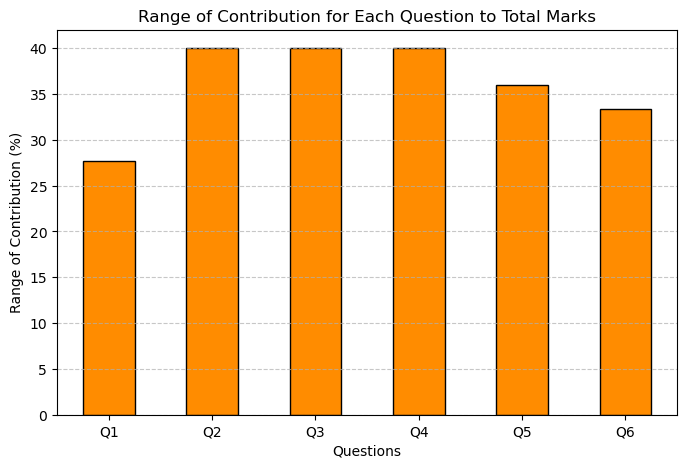

In [115]:
filtered_data = a.loc[(a['Total'] >= 25) & (a['Total'] <= 35)]
contribution = filtered_data[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']].div(filtered_data['Total'], axis=0) * 100
range_contribution = contribution.max() - contribution.min()
plt.figure(figsize=(8, 5))
range_contribution.plot(kind='bar', color='darkorange', edgecolor='black')
plt.title("Range of Contribution for Each Question to Total Marks")
plt.xlabel("Questions")
plt.ylabel("Range of Contribution (%)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Code shows the range of contribution (maximum - minimum) of each question (Q1-Q6) to total marks for students with total marks between 25-35, visualized as a bar plot with gridlines.

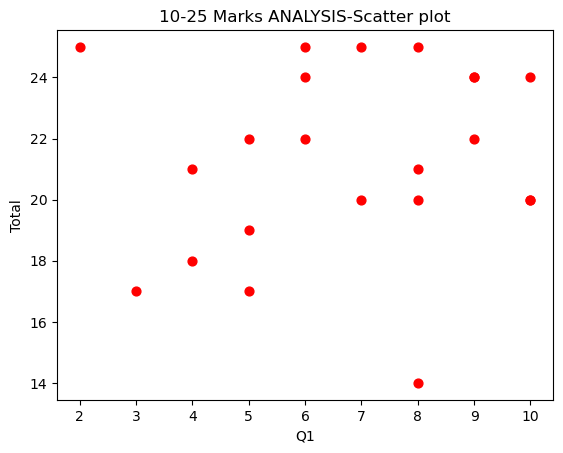

In [117]:
b=a.loc[(a['Total'] >= 10) & (a['Total'] <= 25)]
b.plot.scatter(x='Q1',y='Total',color='red',s=40)
plt.title("10-25 Marks ANALYSIS-Scatter plot")
plt.show()

Scatter plot visualizes the relationship between Q1 marks and total marks for students scoring between 10-25. Red points represent individual data points, highlighting the distribution and correlation.

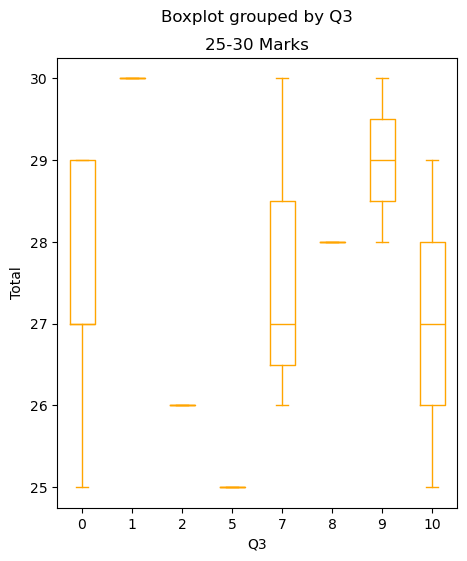

In [119]:
c=a.loc[(a['Total'] >= 25) & (a['Total'] <= 30)]
c.boxplot(by='Q3', column =['Total'], grid = False,color='orange',figsize=[5,6])
plt.title("25-30 Marks")
plt.ylabel("Total")
plt.show()

Boxplot displays the distribution of total marks for students scoring between 25-30, grouped by Q3 marks. Orange color highlights the range, with labels indicating the total marks for each group.

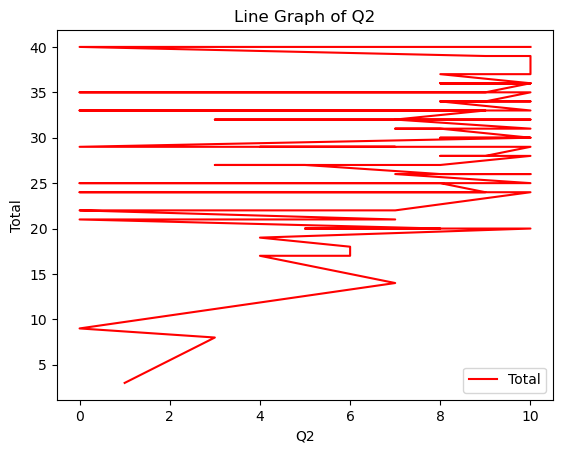

In [121]:
a.plot.line(x='Q2',y='Total',color='red')
plt.title("Line Graph of Q2")
plt.ylabel("Total")
plt.show()

This line graph shows the relationship between Q2 marks and total marks, with Q2 on the x-axis and total marks on the y-axis, using a red line to connect the data points.

**Conclusion**
The dataset analysis reveals variations in student performance across different questions. The total marks distribution suggests that a majority of students score in a mid-range, indicating an average level of understanding. Certain questions, such as Q4aM3 and Q6bM6, have a high percentage of missing scores, suggesting that students either skipped them or found them difficult. Additionally, long-answer questions like Q5M10 show more variation in scores, indicating differences in comprehension and expression among students.  
From the visualization trends, we can infer that some questions may require better explanation or revision sessions, while others might need adjustments in grading or question design. This analysis provides a foundation for improving student performance assessment and refining the exam structure for future evaluations.